In [1]:
import math
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.tools import eval_measures
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [192]:
nflis_data = pd.read_csv("2018_MCMProblemC_DATA/MCM_NFLIS_Data_onePage.csv")

In [193]:
len(set(nflis_data['COUNTY']))

358

In [194]:
nflis_data.head()

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState
0,2010,VA,ACCOMACK,51,1,51001,Propoxyphene,1,84,41462
1,2010,OH,ADAMS,39,1,39001,Morphine,9,527,70999
2,2010,PA,ADAMS,42,1,42001,Methadone,2,334,89981
3,2010,VA,ALEXANDRIA CITY,51,510,51510,Heroin,5,427,41462
4,2010,PA,ALLEGHENY,42,3,42003,Hydromorphone,5,8500,89981


In [54]:
sum(nflis_data.loc[nflis_data['State'] == 'VA']['DrugReports'])

73430

In [63]:
test = nflis_data.loc[nflis_data['COUNTY'] == 'BUCKINGHAM']

In [77]:
test.loc[test['YYYY'] == 2010]

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState
38,2010,VA,BUCKINGHAM,51,29,51029,Heroin,1,136,41462
39,2010,VA,BUCKINGHAM,51,29,51029,Methadone,2,136,41462
347,2010,VA,BUCKINGHAM,51,29,51029,Oxycodone,9,136,41462
445,2010,VA,BUCKINGHAM,51,29,51029,Buprenorphine,1,136,41462
446,2010,VA,BUCKINGHAM,51,29,51029,Propoxyphene,2,136,41462
638,2010,VA,BUCKINGHAM,51,29,51029,Morphine,2,136,41462
745,2010,VA,BUCKINGHAM,51,29,51029,Hydrocodone,2,136,41462


In [64]:
test.loc[test['SubstanceName'] == 'Heroin']

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState
38,2010,VA,BUCKINGHAM,51,29,51029,Heroin,1,136,41462
2702,2011,VA,BUCKINGHAM,51,29,51029,Heroin,3,144,28969
5756,2012,VA,BUCKINGHAM,51,29,51029,Heroin,1,113,32251
8861,2013,VA,BUCKINGHAM,51,29,51029,Heroin,2,176,47694
11672,2014,VA,BUCKINGHAM,51,29,51029,Heroin,5,139,32265
17141,2016,VA,BUCKINGHAM,51,29,51029,Heroin,2,109,33539
20818,2017,VA,BUCKINGHAM,51,29,51029,Heroin,6,144,36994


In [ ]:
update 

In [ ]:
24062

In [162]:
len(total_count_state)

24062

In [195]:
year_lst = []
state_lst = []
county_lst = []
substance_lst = []
substance_count_lst = []
total_count_county = []
total_count_state = []
total_count_county_include_others = []
total_count_state_include_others = []

for year in sorted(set(nflis_data['YYYY'])):
    year_data = nflis_data.loc[nflis_data['YYYY'] == year]
    year_dict = {}

    for state in set(year_data['State']):
        state_data = year_data.loc[year_data['State'] == state]
        state_dict = {}

        for county in set(state_data['COUNTY']):
            county_data = state_data.loc[state_data['COUNTY'] == county]
            county_dict = {}
            
            for substanceName in set(county_data['SubstanceName']):
                substance_data = county_data.loc[county_data['SubstanceName'] == substanceName]
                count = int(substance_data['DrugReports'])
                county_total = substance_data['TotalDrugReportsCounty']
                state_total = substance_data['TotalDrugReportsState']
                
                county_dict[substanceName] = count
                
                year_lst.append(year)
                state_lst.append(state)
                county_lst.append(county)

                substance_lst.append(substanceName)
                substance_count_lst.append(count)
                
                total_count_county_include_others.append(int(county_total))
                total_count_state_include_others.append(int(state_total))
            for i in range(len(set(county_data['SubstanceName']))):
                total_count_county.append(sum(county_data['DrugReports']))
                total_count_state.append(sum(state_data['DrugReports']))

{'2010': {'VA': {}, 'WV': {}, 'OH': {}, 'KY': {}, 'PA': {}},
 '2011': {'VA': {}, 'WV': {}, 'OH': {}, 'KY': {}, 'PA': {}},
 '2012': {'VA': {}, 'WV': {}, 'OH': {}, 'KY': {}, 'PA': {}},
 '2013': {'VA': {}, 'WV': {}, 'OH': {}, 'KY': {}, 'PA': {}},
 '2014': {'VA': {}, 'WV': {}, 'OH': {}, 'KY': {}, 'PA': {}},
 '2015': {'VA': {}, 'WV': {}, 'OH': {}, 'KY': {}, 'PA': {}},
 '2016': {'VA': {}, 'WV': {}, 'OH': {}, 'KY': {}, 'PA': {}},
 '2017': {'VA': {}, 'WV': {}, 'OH': {}, 'KY': {}, 'PA': {}}}

In [196]:
update_data = {
    'Year': year_lst,
    'State': state_lst,
    'County': county_lst,
    'SubstanceName': substance_lst,
    'DrugReports': substance_count_lst,
    'DrugReportsCounty': total_count_county,
    'TotalDrugReportsCounty': total_count_county_include_others,
    'DrugReportsState': total_count_state,
    'TotalDrugReportsState': total_count_state_include_others
}

In [197]:
updated_data = pd.DataFrame.from_dict(update_data)

In [198]:
updated_data.head()

,Year,State,County,SubstanceName,DrugReports,DrugReportsCounty,TotalDrugReportsCounty,DrugReportsState,TotalDrugReportsState
0,2010,VA,PITTSYLVANIA,Methadone,2,16,182,8685,41462
1,2010,VA,PITTSYLVANIA,Heroin,1,16,182,8685,41462
2,2010,VA,PITTSYLVANIA,Hydrocodone,7,16,182,8685,41462
3,2010,VA,PITTSYLVANIA,Oxycodone,5,16,182,8685,41462
4,2010,VA,PITTSYLVANIA,Morphine,1,16,182,8685,41462


In [199]:
updated_data.to_csv("2018_MCMProblemC_DATA/updated_nflis_data.csv", index=False)

In [78]:
updated_nflis_data = nflis_data

In [84]:
sum(drug_report_dict['2010']['VA'].values())

8685

In [136]:
test_data = updated_nflis_data[1:10]

In [137]:
type(test_data)

pandas.core.frame.DataFrame

In [142]:
# test_data.loc[test_data['COUNTY'] == 'ALEXANDRIA' ]
test_data.loc[test_data['COUNTY'] == 'ALEXANDRIA']

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState


In [132]:
for year in drug_report_dict:
    year_dict = drug_report_dict[year]
    for state in year_dict:
        county_dict = year_dict[state]
        for county in county_dict:
            if str(test_data.loc[test_data['COUNTY'] == county]['COUNTY']) == county:
#                 print(row['DrugReports'] / county_dict[county])

PITTSYLVANIA
LYNCHBURG CITY
CAROLINE
PAGE
NOTTOWAY
RAPPAHANNOCK
STAUNTON CITY
GLOUCESTER
LEXINGTON CITY
WISE
AUGUSTA
BUENA VISTA CITY
CLARKE
SOUTHAMPTON
CHESTERFIELD
JAMES CITY
CRAIG
ARLINGTON
CARROLL
SUFFOLK CITY
FAIRFAX
LANCASTER
COLONIAL HEIGHTS CITY
WARREN
HANOVER
EMPORIA CITY
AMHERST
VIRGINIA BEACH CITY
LOUDOUN
BOTETOURT
SURRY
ROCKINGHAM
BATH
ACCOMACK
WYTHE
BLAND
HARRISONBURG CITY
DINWIDDIE
MATHEWS
GILES
PRINCE GEORGE
NEW KENT
BEDFORD CITY
GALAX CITY
NORTHUMBERLAND
MADISON
MANASSAS CITY
ROCKBRIDGE
PRINCE EDWARD
FRANKLIN
GOOCHLAND
CHESAPEAKE CITY
GREENE
CHARLOTTE
RICHMOND
APPOMATTOX
LEE
HALIFAX
DICKENSON
BEDFORD
RUSSELL
BUCKINGHAM
SMYTH
LOUISA
FAUQUIER
DANVILLE CITY
CULPEPER
MIDDLESEX
MECKLENBURG
PORTSMOUTH CITY
WILLIAMSBURG CITY
CHARLOTTESVILLE CITY
SPOTSYLVANIA
WESTMORELAND
NELSON
GREENSVILLE
WAYNESBORO CITY
ALBEMARLE
FREDERICKSBURG CITY
ALEXANDRIA CITY
PULASKI
FLUVANNA
NORTON CITY
HOPEWELL CITY
MARTINSVILLE CITY
SCOTT
ALLEGHANY
NORFOLK CITY
AMELIA
FREDERICK
KING WILLIAM
NEWPORT 

UNION
ERIE
FAIRFIELD
MONTGOMERY
BUTLER
AUGLAIZE
MONROE
COLUMBIANA
PERRY
HAMILTON
FAYETTE
ASHTABULA
MORGAN
WASHINGTON
HENRY
HIGHLAND
NOBLE
LUCAS
BOYLE
HART
BOONE
BALLARD
LOGAN
PENDLETON
MCLEAN
MUHLENBERG
GARRARD
ROWAN
ANDERSON
JOHNSON
GRAVES
WOLFE
CARROLL
CARLISLE
CLARK
GRANT
WARREN
LETCHER
OLDHAM
CRITTENDEN
JACKSON
OWSLEY
SIMPSON
ROBERTSON
EDMONSON
KNOTT
KENTON
BATH
LIVINGSTON
ALLEN
OHIO
POWELL
HARDIN
ADAIR
WOODFORD
MCCRACKEN
WAYNE
BREATHITT
BRECKINRIDGE
BULLITT
MAGOFFIN
TRIMBLE
MCCREARY
MADISON
GALLATIN
FRANKLIN
BOURBON
FULTON
LEE
ESTILL
TODD
MENIFEE
RUSSELL
CHRISTIAN
JESSAMINE
MARSHALL
HICKMAN
JEFFERSON
ROCKCASTLE
MARION
CLINTON
LEWIS
LYON
NELSON
LAUREL
TRIGG
HARRISON
HARLAN
HENDERSON
KNOX
LAWRENCE
PULASKI
FLEMING
BRACKEN
GREEN
CASEY
SCOTT
PIKE
LARUE
WEBSTER
SPENCER
CARTER
MERCER
MEADE
MASON
TAYLOR
BELL
BOYD
WHITLEY
SHELBY
UNION
LESLIE
CALDWELL
HOPKINS
GREENUP
MONTGOMERY
CUMBERLAND
BUTLER
METCALFE
ELLIOTT
CLAY
LINCOLN
NICHOLAS
MONROE
DAVIESS
CAMPBELL
PERRY
BARREN
MARTIN
FAYETTE
CALLO

In [130]:
def update_county_rate(row):
    for year in drug_report_dict:
        year_dict = drug_report_dict[year]
        for state in year_dict:
            county_dict = year_dict[state]
            for county in county_dict:
                if (row['COUNTY'] == county) and (row['State'] == state) and (row['YYYY'] == year):
                    print(county + ' ' + state + ' ' + year)
                    return row['DrugReports'] / county_dict[county]

In [122]:
test_data['DrugRateCounty'] = test_data.apply (lambda row: update_county_rate (row), axis=1)

/Users/wenjuc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
test_data

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState,DrugRateCounty
1,2010,OH,ADAMS,39,1,39001,Morphine,9,None,70999,None
2,2010,PA,ADAMS,42,1,42001,Methadone,2,None,89981,None
3,2010,VA,ALEXANDRIA CITY,51,510,51510,Heroin,5,None,41462,None
4,2010,PA,ALLEGHENY,42,3,42003,Hydromorphone,5,None,89981,None
5,2010,KY,ALLEN,21,3,21003,Oxycodone,15,None,29588,None
6,2010,KY,ALLEN,21,3,21003,Oxymorphone,1,None,29588,None
7,2010,VA,AMELIA,51,7,51007,Heroin,1,None,41462,None
8,2010,VA,ARLINGTON,51,13,51013,Heroin,41,None,41462,None
9,2010,PA,ARMSTRONG,42,5,42005,Dextropropoxyphene,1,None,89981,None


In [102]:
def update_state_data (row):
    for year in drug_report_dict:
        year_dict = drug_report_dict[year]
        for state in year_dict:
            county_dict = year_dict[state]
            for county in county_dict:
                if (row['COUNTY'] == county) and (row['State'] == state) and (row['YYYY'] == year):
#                     row['TotalDrugReportsCounty'] = county_dict[county]
                    return sum(drug_report_dict[year][state].values())

In [103]:
updated_nflis_data['TotalDrugReportsState'] = updated_nflis_data.apply (lambda row: update_state_data (row),axis=1)

KeyboardInterrupt: 

In [6]:
data_KY = nflis_data.loc[nflis_data["State"] == "KY"]
data_OH = nflis_data.loc[nflis_data["State"] == "OH"]
data_PA = nflis_data.loc[nflis_data["State"] == "PA"]
data_VA = nflis_data.loc[nflis_data["State"] == "VA"]
data_WV = nflis_data.loc[nflis_data["State"] == "WV"]

In [37]:
data_KY

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState
5,2010,KY,ALLEN,21,3,21003,Oxycodone,15,168,29588
6,2010,KY,ALLEN,21,3,21003,Oxymorphone,1,168,29588
20,2010,KY,BARREN,21,9,21009,Morphine,3,383,29588
21,2010,KY,BATH,21,11,21011,Buprenorphine,1,81,29588
22,2010,KY,BATH,21,11,21011,Hydrocodone,7,81,29588
25,2010,KY,BELL,21,13,21013,Oxycodone,148,387,29588
26,2010,KY,BELL,21,13,21013,Oxymorphone,3,387,29588
30,2010,KY,BOONE,21,15,21015,Oxycodone,56,299,29588
32,2010,KY,BRACKEN,21,23,21023,Oxycodone,5,28,29588
34,2010,KY,BREATHITT,21,25,21025,Methadone,13,162,29588


In [24]:
data_4_Methylenedioxy = nflis_data.loc[nflis_data["State"] == "KY"]
data_3_Fluorofentanyl = nflis_data.loc[nflis_data["State"] == "OH"]
data_3_Methylfentanyl= nflis_data.loc[nflis_data["State"] == "PA"]


In [35]:
data_4_Methylenedioxy['COUNTY'].loc[data_4_Methylenedioxy['DrugReports'] == max(data_4_Methylenedioxy['DrugReports'])]

12270    JEFFERSON
Name: COUNTY, dtype: object

In [22]:
set(nflis_data['SubstanceName'])

{'3,4-Methylenedioxy U-47700',
 '3-Fluorofentanyl',
 '3-Methylfentanyl',
 '4-Fluoroisobutyryl fentanyl',
 '4-Methylfentanyl',
 'ANPP',
 'Acetyl fentanyl',
 'Acetylcodeine',
 'Acetyldihydrocodeine',
 'Acryl fentanyl',
 'Alphaprodine',
 'Benzylfentanyl',
 'Buprenorphine',
 'Butorphanol',
 'Butyryl fentanyl',
 'Carfentanil',
 'Codeine',
 'Crotonyl fentanyl',
 'Cyclopentyl fentanyl',
 'Cyclopropyl fentanyl',
 'Cyclopropyl/Crotonyl Fentanyl',
 'Desmethylprodine ',
 'Dextropropoxyphene',
 'Dihydrocodeine',
 'Dihydromorphone',
 'Fentanyl',
 'Fluorobutyryl fentanyl ',
 'Fluorofentanyl',
 'Fluoroisobutyryl fentanyl',
 'Furanyl fentanyl',
 'Furanyl/3-Furanyl fentanyl',
 'Heroin',
 'Hydrocodeinone',
 'Hydrocodone',
 'Hydromorphone',
 'Isobutyryl fentanyl',
 'Levorphanol',
 'MT-45',
 'Meperidine',
 'Metazocine',
 'Methadone',
 'Methorphan',
 'Methoxyacetyl fentanyl',
 'Mitragynine',
 'Morphine',
 'Nalbuphine',
 'Opiates',
 'Opium',
 'Oxycodone',
 'Oxymorphone',
 'Pentazocine',
 'Pethidine',
 'Phen

In [19]:
# max(data_KY['DrugReports'])
len(data_KY.loc[data_KY['SubstanceName'] == 'Heroin'])

569

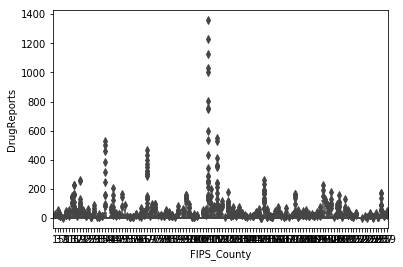

In [9]:
box = sns.boxplot(x="FIPS_County", y="DrugReports", data=data_KY)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c16d338d0>,
      dtype=object)

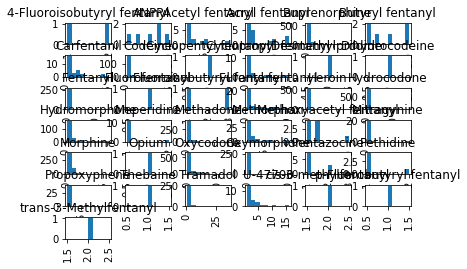

In [17]:
data_KY['DrugReports'].hist(by=data_KY['SubstanceName'])